In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hieroglyphpadding/dataset(padding)/N29/410195_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230124_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/220204_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/030289_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050353_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/070257_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050050_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/210080_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050171_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230154_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/090314_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230176_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/070253_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050155_N29.png
/kaggle/input/hieroglyphpadding/dataset(padding)

In [2]:
import pathlib
import cv2
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = '/kaggle/input/hieroglyphpadding/dataset(padding)'
data_dir

'/kaggle/input/hieroglyphpadding/dataset(padding)'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)')

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

3981

In [6]:
D2 = list(data_dir.glob('D2/*'))
D2[:5]

[PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/D2/030410_D2.png'),
 PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/D2/230216_D2.png'),
 PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/D2/050379_D2.png'),
 PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/D2/050333_D2.png'),
 PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/D2/070224_D2.png')]

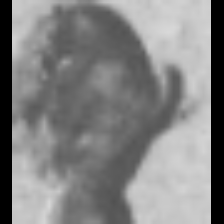

In [7]:
PIL.Image.open(str(D2[0]))

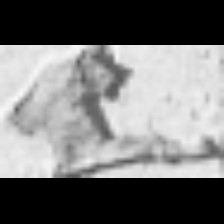

In [8]:
F4 = list(data_dir.glob('F4/*'))
PIL.Image.open(str(F4[0]))

In [9]:
from pathlib import Path

# Define the path to the organized images directory
organized_dir = Path('/kaggle/input/hieroglyphpadding/dataset(padding)')

# Dictionary to store image codes as keys and lists of Path objects as values
image_dict = {}

# Loop through each folder (representing image codes) in the organized directory
for image_code_folder in organized_dir.iterdir():
    if image_code_folder.is_dir():  # Ensure it's a directory
        # Convert the generator to a list of Path objects
        file_paths = list(image_code_folder.glob('*'))
        # Add to the dictionary
        image_dict[image_code_folder.name] = file_paths

print("Image dictionary:", image_dict)

Image dictionary: {'N29': [PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/410195_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230124_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/220204_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/030289_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050353_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/070257_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050050_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/210080_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050171_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230154_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/090314_N29.png'), PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230176_

In [10]:
image_dict

{'N29': [PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/410195_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230124_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/220204_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/030289_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050353_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/070257_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050050_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/210080_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/050171_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230154_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/090314_N29.png'),
  PosixPath('/kaggle/input/hieroglyphpadding/dataset(padding)/N29/230

In [11]:
# Dictionary to store image codes as keys and their numeric labels as values
labels_dict = {
    'N29': 0, 'D52': 1, 'N35': 2, 'U15': 3, 'M16': 4, 'G37': 5, 'T28': 6, 'Y2': 7,
    'W18': 8, 'T20': 9, 'N37': 10, 'M23': 11, 'D54': 12, 'H6': 13, 'T30': 14, 'M18': 15,
    'S24': 16, 'U33': 17, 'I9': 18, 'F40': 19, 'U1': 20, 'V13': 21, 'R4': 22, 'G35': 23,
    'O50': 24, 'D60': 25, 'M195': 26, 'W24': 27, 'D10': 28, 'F18': 29, 'Aa26': 30, 'O31': 31,
    'I10': 32, 'O28': 33, 'G40': 34, 'D28': 35, 'E1': 36, 'G39': 37, 'O49': 38, 'Q7': 39,
    'F34': 40, 'G7': 41, 'V28': 42, 'F9': 43, 'D2': 44, 'L1': 45, 'E34': 46, 'M12': 47,
    'S29': 48, 'F16': 49, 'G4': 50, 'N36': 51, 'N14': 52, 'Q3': 53, 'M29': 54, 'O34': 55,
    'G26': 56, 'D36': 57, 'Y3': 58, 'F4': 59, 'G29': 60, 'P1': 61, 'S28': 62, 'N30': 63,
    'D35': 64, 'V31': 65, 'M42': 66, 'W25': 67, 'W19': 68, 'D4': 69, 'N31': 70, 'Q1': 71,
    'D46': 72, 'O1': 73, 'M8': 74, 'U28': 75, 'G14': 76, 'P8': 77, 'N25': 78, 'Z11': 79,
    'G36': 80, 'D1': 81, 'N1': 82, 'D19': 83, 'M44': 84, 'N18': 85, 'M41': 86, 'Z7': 87,
    'M20': 88, 'M40': 89, 'P6': 90, 'G21': 91, 'D58': 92, 'Z1': 93, 'F35': 94, 'T22': 95,
    'G17': 96, 'N17': 97, 'X1': 98, 'M1': 99, 'N5': 100, 'T21': 101, 'D39': 102, 'G43': 103,
    'E9': 104, 'G1': 105, 'V30': 106, 'M17': 107, 'W11': 108, 'R8': 109, 'G5': 110, 'U7': 111,
    'F13': 112, 'G25': 113, 'Aa27': 114, 'Aa15': 115, 'V24': 116, 'Y5': 117, 'N41': 118,
    'D56': 119, 'F26': 120, 'S34': 121, 'D21': 122, 'E23': 123, 'V4': 124, 'F31': 125,
    'X8': 126, 'M3': 127, 'O4': 128, 'V7': 129
}



# Loop through each folder (representing image codes) in the organized directory
# for idx, image_code_folder in enumerate(organized_dir.iterdir()):
#     if image_code_folder.is_dir():  # Ensure it's a directory
#         # Assign a numeric label starting from 0
#         labels_dict[image_code_folder.name] = idx

print("Labels dictionary:", labels_dict)

Labels dictionary: {'N29': 0, 'D52': 1, 'N35': 2, 'U15': 3, 'M16': 4, 'G37': 5, 'T28': 6, 'Y2': 7, 'W18': 8, 'T20': 9, 'N37': 10, 'M23': 11, 'D54': 12, 'H6': 13, 'T30': 14, 'M18': 15, 'S24': 16, 'U33': 17, 'I9': 18, 'F40': 19, 'U1': 20, 'V13': 21, 'R4': 22, 'G35': 23, 'O50': 24, 'D60': 25, 'M195': 26, 'W24': 27, 'D10': 28, 'F18': 29, 'Aa26': 30, 'O31': 31, 'I10': 32, 'O28': 33, 'G40': 34, 'D28': 35, 'E1': 36, 'G39': 37, 'O49': 38, 'Q7': 39, 'F34': 40, 'G7': 41, 'V28': 42, 'F9': 43, 'D2': 44, 'L1': 45, 'E34': 46, 'M12': 47, 'S29': 48, 'F16': 49, 'G4': 50, 'N36': 51, 'N14': 52, 'Q3': 53, 'M29': 54, 'O34': 55, 'G26': 56, 'D36': 57, 'Y3': 58, 'F4': 59, 'G29': 60, 'P1': 61, 'S28': 62, 'N30': 63, 'D35': 64, 'V31': 65, 'M42': 66, 'W25': 67, 'W19': 68, 'D4': 69, 'N31': 70, 'Q1': 71, 'D46': 72, 'O1': 73, 'M8': 74, 'U28': 75, 'G14': 76, 'P8': 77, 'N25': 78, 'Z11': 79, 'G36': 80, 'D1': 81, 'N1': 82, 'D19': 83, 'M44': 84, 'N18': 85, 'M41': 86, 'Z7': 87, 'M20': 88, 'M40': 89, 'P6': 90, 'G21': 91, '

In [12]:
img = cv2.imread(str(image_dict['D2'][0]))

In [13]:
img.shape

(224, 224, 3)

In [14]:
X, y = [], []

for image_name, images in image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224))
    X.append(resized_img)
    y.append(labels_dict[image_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  
    stratify=y,     
    random_state=42 
)

In [17]:
len(X_train)

3184

In [18]:
len(X_test)

797

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
X_train_scaled

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.Input(shape=(224, 224, 3)),  
    layers.RandomFlip("horizontal"),  
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
])

In [22]:
num_classes = 130

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2024-09-11 06:20:24.722821: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3910 - loss: 3.1389
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5611 - loss: 1.7238
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6106 - loss: 1.4468
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6540 - loss: 1.2231
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7345 - loss: 0.9935
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7634 - loss: 0.8704
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8015 - loss: 0.7214
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8236 - loss: 0.6360
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8441 - loss: 0.5674
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8600 - loss: 0.4675
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8773 - loss: 0.4074
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/st

In [23]:
model.evaluate(X_test_scaled, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9181 - loss: 0.3196


[0.3310015797615051, 0.9134253263473511]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[-11.001184 , -17.473095 ,  -8.390707 , ..., -14.673122 ,
        -11.190789 , -14.738808 ],
       [-12.526214 , -20.886703 ,  -8.67585  , ..., -16.799446 ,
        -12.071275 , -18.31094  ],
       [ -2.9027362, -14.344114 , -13.169673 , ..., -15.816044 ,
          0.537679 , -21.085632 ],
       ...,
       [-18.692858 , -29.793356 , -17.491121 , ..., -21.649254 ,
         -6.6228437, -24.494427 ],
       [ -2.689232 , -19.250704 , -20.592173 , ..., -13.174221 ,
        -13.006867 , -23.263832 ],
       [ -7.085866 ,  -0.9763203, -16.095055 , ..., -12.970615 ,
        -16.213427 , -18.433554 ]], dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(130,), dtype=float32, numpy=
array([5.31723607e-08, 8.22187735e-11, 7.23438973e-07, 1.68750947e-09,
       1.12343415e-08, 1.29014850e-07, 1.47677142e-08, 2.39831024e-06,
       7.16737603e-08, 1.62646011e-05, 2.96961775e-06, 6.35505057e-06,
       2.45109599e-09, 2.74559949e-04, 5.21120480e-10, 5.47743822e-03,
       2.21119123e-08, 5.55748236e-04, 2.44479992e-07, 1.97488372e-08,
       1.74886505e-09, 2.22747985e-06, 3.26165193e-08, 5.50737468e-06,
       7.37550799e-05, 2.09662652e-08, 8.47340052e-05, 9.57501925e-07,
       2.73778333e-08, 9.82615234e-08, 1.24834841e-07, 1.53701962e-09,
       7.86737928e-08, 1.76993106e-03, 3.98090538e-09, 7.83794452e-09,
       7.17875218e-06, 3.31688170e-06, 3.11319255e-08, 5.73583891e-09,
       3.40304427e-06, 2.27779719e-06, 1.32529897e-06, 2.18110113e-10,
       9.75386953e-08, 1.86078832e-08, 2.56413273e-07, 1.47330093e-10,
       1.76933941e-06, 8.01606390e-08, 8.50841353e-09, 1.80482473e-08,
       1.05426716e-06, 5.2705

In [26]:
np.argmax(score)

107

In [27]:
y_test[0]

107

In [28]:
# Save the entire model
model.save('cnn_model.keras')